<a href="https://colab.research.google.com/github/18K41A0288/NNDL/blob/main/Assignment%2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import math
from math import *
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
load_data = pd.read_excel("/content/drive/MyDrive/Load Data in kW.xlsx",header = None)
load_data.describe()

,0
count,2184.000000
mean,6393.230623
std,17139.102597
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,805444.430400


In [2]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [3]:
from scipy import stats
z = np.abs(stats.zscore(load_data.iloc[:,0]))
threshold = 3
print(np.where(z > 3))

(array([929]),)


In [6]:
load_data.iloc[929,0] = load_data.iloc[928,0]
data = minmax_scale(load_data.iloc[:,0])
print(data)

[0.39787738 0.29380046 0.27645431 ... 0.24629825 0.32438447 0.65165045]


[[0.29380046 0.28430002]
 [0.27645431 0.25579869]
 [0.31023366 0.24450087]
 ...
 [0.68414596 0.21779692]
 [0.51467861 0.24629825]
 [0.41730621 0.32438447]]
[0.25579869 0.24450087 0.23996462 ... 0.24629825 0.32438447 0.65165045]


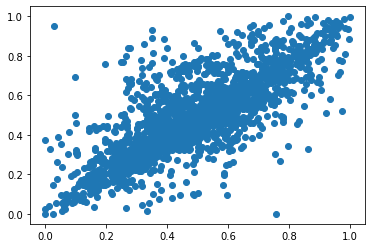

In [9]:
x = []
y = []
for i in range(1,len(data)-24):
  temp = [data[i],data[i+23]]
  x.append(temp)
  y.append(data[i+24])

x = np.array(x)
y = np.array(y)
print(x)
print(y)
plt.scatter(x[:,[1]],y)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1727
1727
432
432


In [14]:
def gradientm0(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x0

def gradientm1(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x1

def gradientc(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)

def error(x,y,m0,m1,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + math.pow((y[[i]][0] - m0*x[[i][0]][0] - m1*x[[i][0]][1] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

learning_rate = 0.01
epochs = 50

m0 = 1
m1 = 1
c = 1

Gm0 = 0
Gm1 = 0
Gc = 0
e = pow(10,-6)
number_of_samples = len(x_train)
error_list = []

for i in range(epochs):
    for j in range(number_of_samples):
        gradient_m0 = gradientm0(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_m1 = gradientm1(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_c = gradientc(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)

        Gm0 = Gm0 + gradient_m0**2
        Gm1 = Gm1 + gradient_m1**2
        Gc = Gc + gradient_c**2

        learning_rate_m0 = learning_rate/sqrt(Gm0+e)
        learning_rate_m1 = learning_rate/sqrt(Gm1+e)
        learning_rate_c = learning_rate/sqrt(Gc+e)
        
        deltam0 = -1*learning_rate_m0*gradient_m0
        deltam1 = -1*learning_rate_m1*gradient_m1
        deltac = -1*learning_rate_c*gradient_c
        
        m0 = m0 + deltam0
        m1 = m1 + deltam1
        c = c + deltac
    err = error(x,y,m0,m1,c)
    print(err)
    error_list.append(err)

0.05661553811392044
0.03399419024767809
0.01598145633225088
0.00788887358189528
0.00802388537082959
0.007799743124849797
0.00861287610118063
0.00787955571807644
0.007746468573142028
0.00806140267721532
0.007770859690990862
0.00790502316863731
0.007740866113994385
0.00892086863146206
0.008559285888016004
0.007843751482821027
0.008475887226884948
0.008136087779234762
0.00796743859485896
0.008188941445276151
0.00795649003267356
0.00855709736180949
0.00814968896270643
0.007978711773902974
0.007965634786796464
0.007957636358856116
0.008127106325801142
0.008243006054689299
0.008025917206883622
0.008369071092499967
0.00812341064025224
0.008081854750133377
0.008132614748170695
0.008121301796909652
0.008090294992277362
0.008151051544100191
0.008118768276679483
0.008138617710681707
0.008216749288842055
0.008145749741840257
0.00826688834537695
0.008177985409009027
0.008204148196389564
0.008246188436165895
0.008229371914090981
0.008224889091673926
0.008225018939550239
0.008227620445124852
0.008228

m0 =  0.6149386055382344 , m1 =  0.05685977071431237  and c =  0.17496844266539352


Text(0.5, 1.0, 'error graph in case of SGD with AdaGrad')

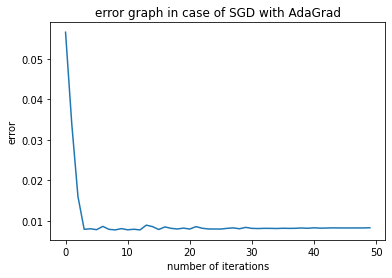

In [18]:
x1 = range(epochs)
y1 = error_list
print("m0 = ",m0,", m1 = ",m1," and c = ",c)

plt.plot(x1,y1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("error graph in case of SGD with AdaGrad")

In [19]:
train_error = error(x_train,y_train,m0,m1,c)
test_error = error(x_test,y_test,m0,m1,c)

print("train error : ",train_error)
print("test error : ",test_error)

train error :  0.008254053851420761
test error :  0.008370770681708212


In [20]:

input_load0 = float(input("enter yesterday load at this time : "))
input_load1 = float(input("enter load at previous hour : "))

max_value = 8841.669480
min_value = 3377.919600

input_load0 = (input_load0 - min_value)/(max_value-min_value)
input_load1 = (input_load1 - min_value)/(max_value-min_value)
output_load = input_load0*m0 + input_load1*m0 + c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 3000
enter load at previous hour : 2900
predicted load for this hour is :  3807.614843403873
